In [1]:
import glob
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Declaring The graphs Inline
%matplotlib inline
plt.style.use('ggplot')

# Removing the Filterwarnings
warnings.filterwarnings('ignore')

In [2]:
file = glob.iglob('*.csv')
df = pd.read_csv(*file)
print(df.head())
print('-------------------------------------')
print(df.tail())

# Spliting the dataframe into Dependent and Independent Variable
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

print(X)
print(Y)

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
-------------------------------------
         Position  Level   Salary
5  Region Manager      6   150000
6         Partner      7   200000
7  Senior Partner      8   300000
8         C-level      9   500000
9             CEO     10  1000000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [12]:
regressor = RandomForestRegressor(n_estimators = 10,
                                 random_state = 0)
regressor.fit(X, Y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [13]:
regressor.predict([[6.5]])

array([167000.])

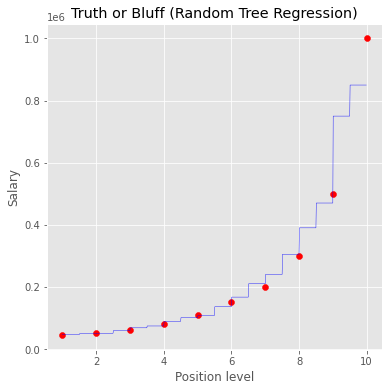

In [14]:
# Plotting the Smooth Results

figure = plt.figure(figsize = (6, 6))

X_grid = np.arange(min(X), 
                   max(X), 
                   0.01)

X_grid = X_grid.reshape((len(X_grid), 
                         1))

plt.scatter(X, 
            Y, 
            color = 'red')

plt.plot(X_grid, 
         regressor.predict(X_grid), 
         color = 'blue', 
         linewidth = 0.4)

plt.title('Truth or Bluff (Random Tree Regression)')

plt.xlabel('Position level')

plt.ylabel('Salary')

plt.show()